# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [20]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [21]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_total = urban_cities_df.groupby(["city"]).count()["ride_id"].sum()
urban_ride_total

1625

In [24]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_total = suburban_cities_df.groupby(["city"]).count()["ride_id"].sum()
suburban_ride_total

625

In [25]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_total = rural_cities_df.groupby(["city"]).count()["ride_id"].sum()
rural_ride_total

125

In [26]:
# 2. Get the total drivers for each city type
urban_driver_total = urban_cities_df.groupby(["city"]).mean()["driver_count"].sum()
urban_driver_total

2405.0

In [27]:
suburban_driver_total = suburban_cities_df.groupby(["city"]).mean()["driver_count"].sum()
suburban_driver_total

490.0

In [28]:
rural_driver_total = rural_cities_df.groupby(["city"]).mean()["driver_count"].sum()
rural_driver_total

78.0

In [29]:
#  3. Get the total amount of fares for each city type
urban_fare_total = urban_cities_df.groupby(["city"]).sum()["fare"].sum()
urban_fare_total

39854.38000000001

In [30]:
suburban_fare_total = suburban_cities_df.groupby(["city"]).sum()["fare"].sum()
suburban_fare_total

19356.33

In [31]:
rural_fare_total = rural_cities_df.groupby(["city"]).sum()["fare"].sum()
rural_fare_total

4327.93

In [32]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare_per_ride = urban_fare_total/urban_ride_total
urban_avg_fare_per_ride

24.525772307692314

In [33]:
suburban_avg_fare_per_ride = suburban_fare_total/suburban_ride_total
suburban_avg_fare_per_ride

30.970128000000003

In [34]:
rural_avg_fare_per_ride = rural_fare_total/rural_ride_total
rural_avg_fare_per_ride

34.62344

In [35]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_per_driver = urban_fare_total/urban_driver_total
urban_avg_fare_per_driver

16.57146777546778

In [36]:
suburban_avg_fare_per_driver = suburban_fare_total/suburban_driver_total
suburban_avg_fare_per_driver

39.50271428571429

In [37]:
rural_avg_fare_per_driver = rural_fare_total/rural_driver_total
rural_avg_fare_per_driver

55.48628205128205

In [38]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [39]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
"": ["Rural", "Suburban", "Urban"],
"Total Rides": [rural_ride_total, suburban_ride_total, urban_ride_total],
"Total Drivers": [rural_driver_total, suburban_driver_total, urban_driver_total],
"Total Fares": [rural_fare_total, suburban_fare_total, urban_fare_total],
"Average Fare per Ride": [rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride],
"Average Fare per Driver": [rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver]
          })
pyber_summary_df

,,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78.0,4327.93,34.623440,55.486282
1,Suburban,625,490.0,19356.33,30.970128,39.502714
2,Urban,1625,2405.0,39854.38,24.525772,16.571468


In [40]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df = pyber_summary_df.set_index("")
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [41]:
#  8. Format the columns.

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [42]:
# 1. Read the merged DataFrame
pyber_data_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban


In [43]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df.groupby(["type", "date"]).sum()["fare"]

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [44]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df_reset = pyber_data_df.reset_index()


In [45]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pyber_data_df_reset.pivot(index='date', columns='type', values='fare')
pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [27]:
pyber_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [46]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_pivot_date_loc = pyber_pivot.loc['2019-01-01':'2019-04-29'] 
pyber_pivot_date_loc

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [49]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_pivot_date_loc.index = pd.to_datetime(pyber_pivot_date_loc.index)
pyber_pivot_date_loc.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [50]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_date_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [58]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_resampled_weekly = pyber_pivot_date_loc.resample("w").sum()
pyber_resampled_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



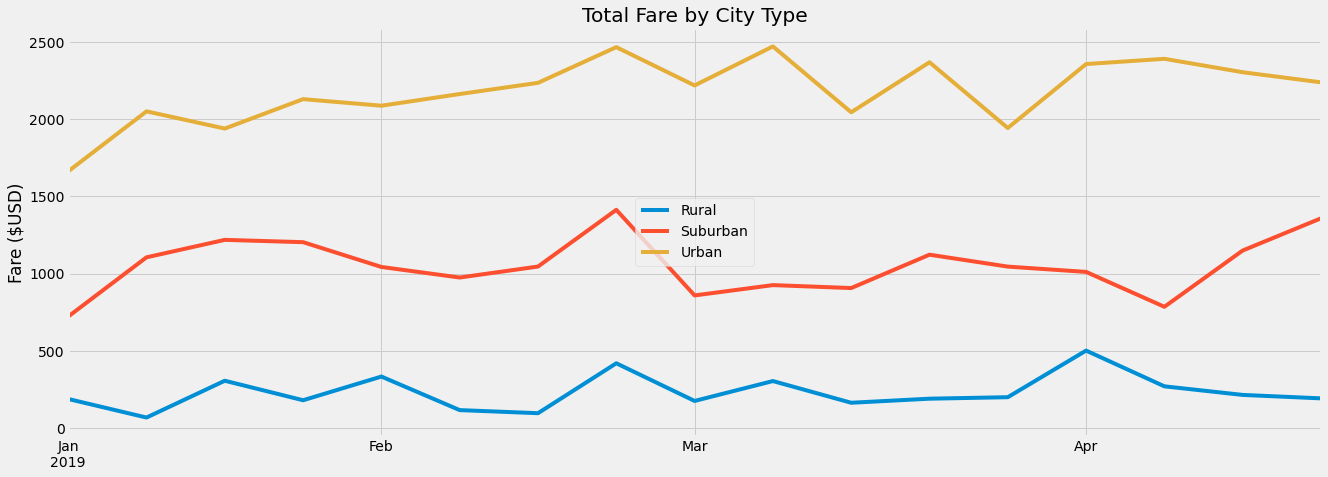

In [69]:
from matplotlib import style
style.use('fivethirtyeight')
ax = pyber_resampled_weekly.plot(figsize = (20,7))
ax.set_title("Total Fare by City Type")
ax.set_xlabel("")
ax.set_ylabel("Fare ($USD)")
ax.legend(loc=10)

plt.show()